<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230510.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta
import os
import re
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [2]:
os.listdir()

['.config',
 'ecommerce-data.csv',
 'sales.csv',
 'online_retail.xlsx',
 '1_order_payments_dataset.csv',
 'sample-sales-data.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'online_retail_II.xlsx',
 '1_orders_dataset.csv',
 'mock_sales_data.csv',
 'match_result_test.csv',
 'test.csv',
 'sales_vs_discount.csv',
 'bz_data_analyis.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'app_wau.csv',
 'ab_experiment.csv',
 'scanner_data.csv',
 'cookie_cats.csv',
 'sales_data_with_stores.csv',
 '1_customers_dataset.csv',
 'lead_conversion.csv',
 'groceries.csv',
 'sample_data']

In [8]:
df = pd.read_csv('mock_sales_data.csv')
df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', a)).lower().lstrip('_') for a in df.columns]
df['date'] = df['date'].to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['rev'] = df['price'] * df['sales_qty']
df.head()

,date,price,sales_qty,week,rev
0,2021-01-04,122.0,1433.0,2021-01-04,174826.0
1,2021-01-05,118.6,977.0,2021-01-04,115872.2
2,2021-01-06,125.0,1551.0,2021-01-04,193875.0
3,2021-01-07,115.2,1096.0,2021-01-04,126259.2
4,2021-01-08,118.1,1052.0,2021-01-04,124241.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       252 non-null    datetime64[ns]
 1   price      252 non-null    float64       
 2   sales_qty  252 non-null    float64       
 3   week       252 non-null    datetime64[ns]
 4   rev        252 non-null    float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 10.0 KB


In [10]:
df.isnull().sum()

date         0
price        0
sales_qty    0
week         0
rev          0
dtype: int64

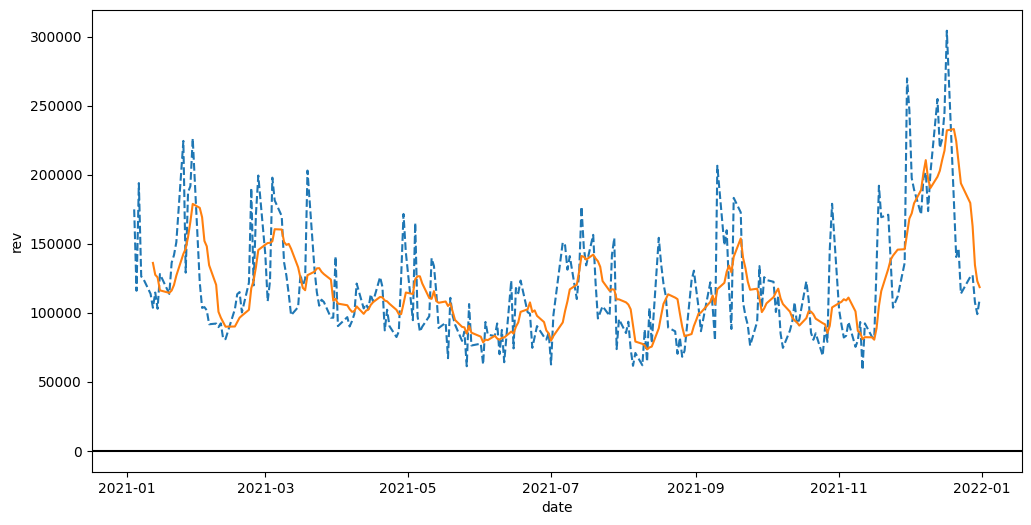

In [23]:
plt.figure(figsize = [12,6])
sns.lineplot(data = df, x = 'date', y = 'rev', linestyle = '--')
sns.lineplot(data = df.assign(roll = df['rev'].rolling(7).mean()), x= 'date', y = 'roll')
plt.axhline(y = 0, color = 'black')
plt.show()

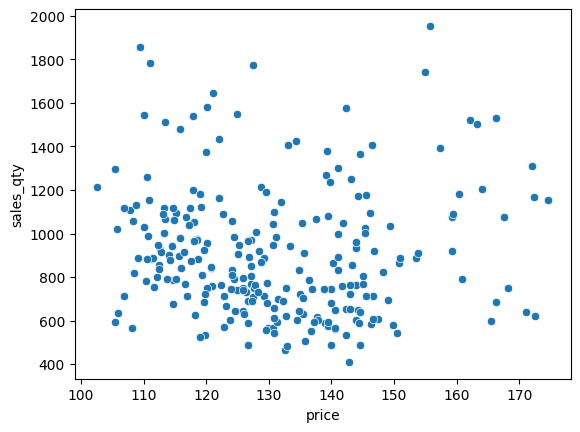

In [24]:
sns.scatterplot(data = df, x = 'price', y = 'sales_qty')
plt.show()

In [28]:
list_weekday = dict(zip(range(7), ['mon','tue','wed','thu','fri','sat','sun']))
df['weekday'] = df['date'].dt.weekday
df['weekday'] = df['weekday'].apply(lambda x : list_weekday.get(x,x))
df.head()

,date,price,sales_qty,week,rev,weekday
0,2021-01-04,122.0,1433.0,2021-01-04,174826.0,mon
1,2021-01-05,118.6,977.0,2021-01-04,115872.2,tue
2,2021-01-06,125.0,1551.0,2021-01-04,193875.0,wed
3,2021-01-07,115.2,1096.0,2021-01-04,126259.2,thu
4,2021-01-08,118.1,1052.0,2021-01-04,124241.2,fri


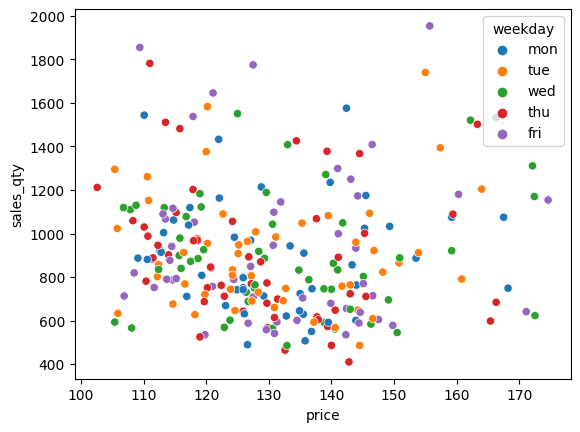

In [29]:
sns.scatterplot(data = df, x = 'price', y = 'sales_qty', hue = 'weekday')
plt.show()

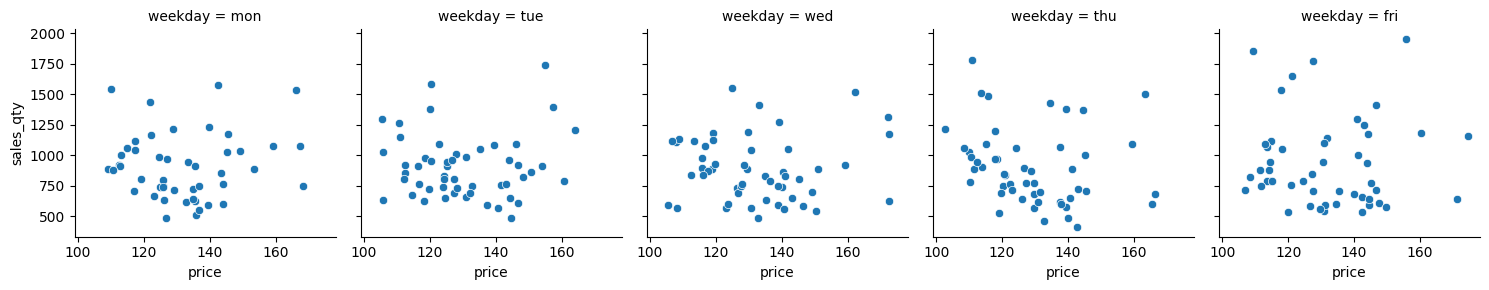

In [30]:
g = sns.FacetGrid(df, col = 'weekday')
g.map(sns.scatterplot, 'price', 'sales_qty')
plt.show()

In [31]:
df['date'].agg(['min','max'])

min   2021-01-04
max   2021-12-31
Name: date, dtype: datetime64[ns]

In [33]:
df['month'] = [str(a) for a in df['date'].dt.month]
df.head()

,date,price,sales_qty,week,rev,weekday,month
0,2021-01-04,122.0,1433.0,2021-01-04,174826.0,mon,1
1,2021-01-05,118.6,977.0,2021-01-04,115872.2,tue,1
2,2021-01-06,125.0,1551.0,2021-01-04,193875.0,wed,1
3,2021-01-07,115.2,1096.0,2021-01-04,126259.2,thu,1
4,2021-01-08,118.1,1052.0,2021-01-04,124241.2,fri,1


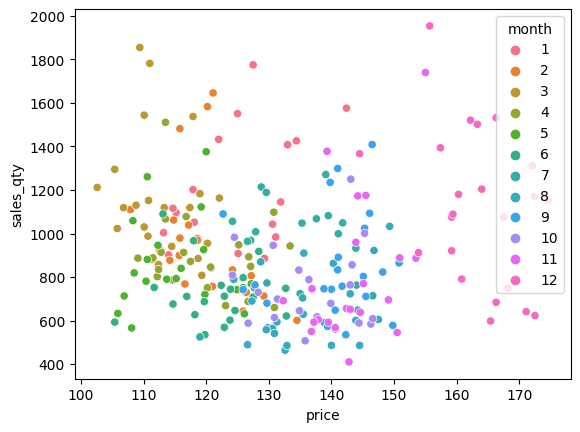

In [34]:
sns.scatterplot(data = df, x = 'price', y = 'sales_qty', hue = 'month')
plt.show()

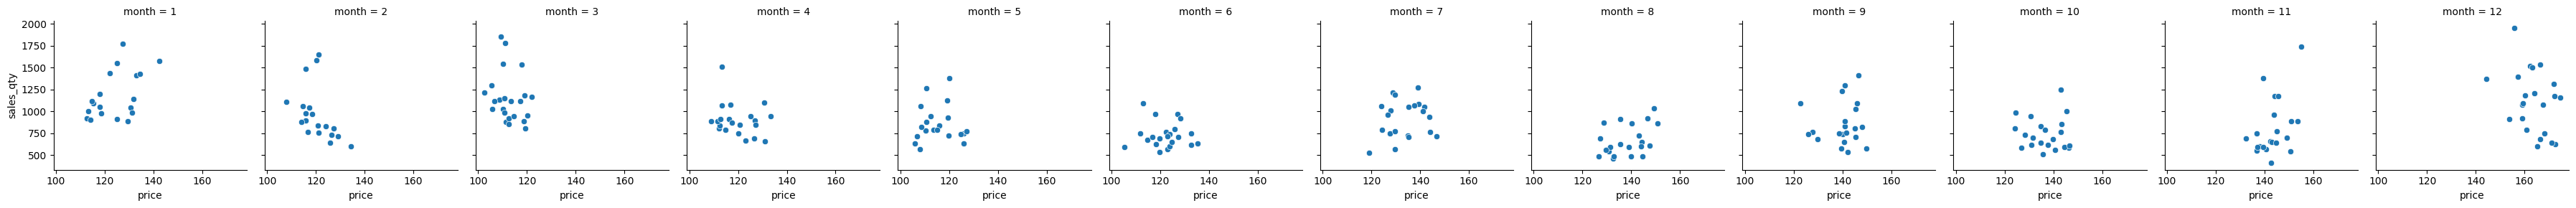

In [35]:
g = sns.FacetGrid(df, col = 'month')
g.map(sns.scatterplot, 'price', 'sales_qty')
plt.show()

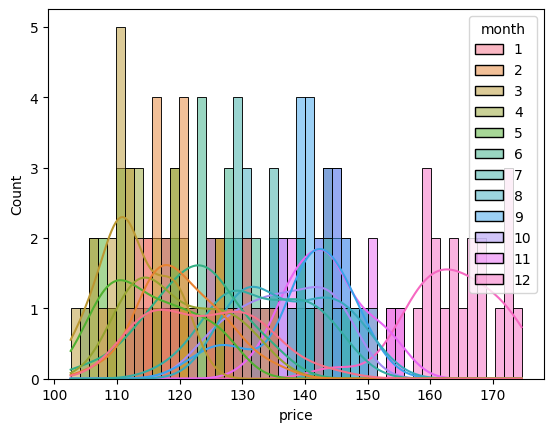

In [36]:
sns.histplot(data = df, x = 'price', hue = 'month', kde = True, bins = 50)
plt.show()

# Iterators

In [37]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [38]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [41]:
{k : [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}